### Name: DEBARTHA PAUL

# VIP Data Science Task-1: Iris Flowers Classification ML Project

### Description:

The iris flowers dataset contains numeric attributes. We have the attributes as:

1. sepal length in cm 

2. sepal width in cm 

3. petal length in cm 

4. petal width in cm 

5. class: 

  (a) -- Iris Setosa 

  (b) -- Iris Versicolour 

  (c) -- Iris Virginica

We have to classify them into different categories using ML.

### Importing libraries and visualising the data

We first load the libraries required for our work and then we read the dataset

,V1,V2,V3,V4,V5
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


[1] 150   5

   sepal.len        sepal.wd       petal.len        petal.wd    
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
    class          
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

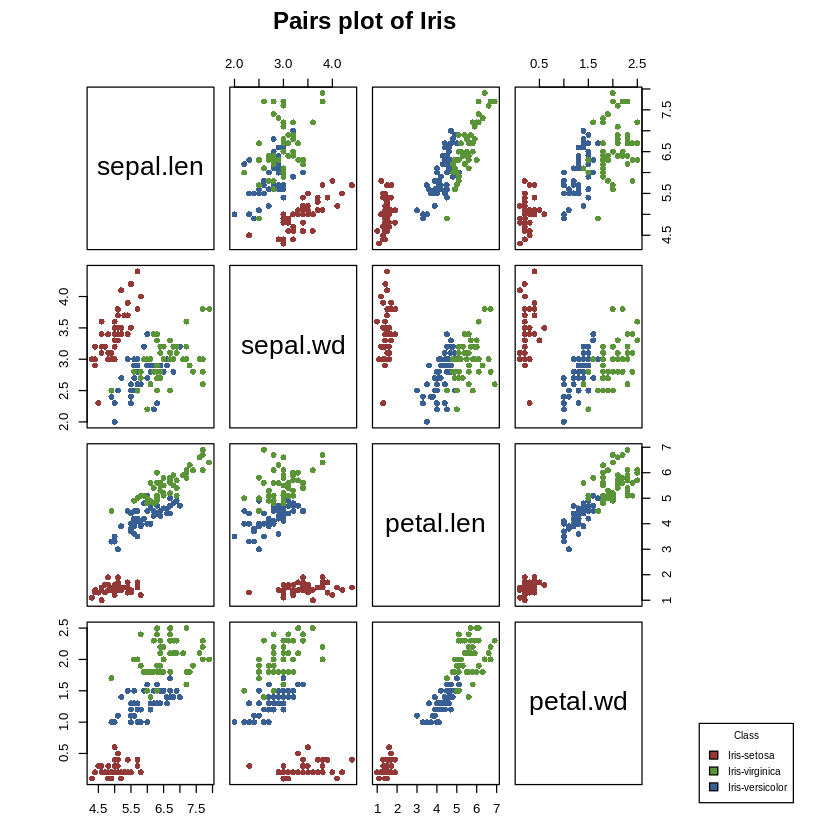

In [1]:
library(class)#for the KNN function
set.seed(200)#setting the seed
df<-read.table('iris.data',
				sep=',',header=F)#reading the file
head(df)#a sneak peek into the dataset
names(df)<-c('sepal.len','sepal.wd','petal.len',
			'petal.wd','class')#setting the names of the columns
dim(df)#dimension of the dataset
summary(df)#a brief summary of the dataset
classno<-ifelse(df$class=='Iris-setosa',1,
				ifelse(df$class=='Iris-virginica',2,3))#factoring on the basis of class

pairs(df[,-5],col=c('#943737','#599437','#375f94')[classno],
		main='Pairs plot of Iris',pch=16,oma=c(3,5,5,12))#plots of the data by various attributes
par(xpd=T)
legend("bottomright",fill=c('#943737','#599437','#375f94'),
		legend=c('Iris-setosa','Iris-virginica','Iris-versicolor'),
		cex=0.5,title='Class')

### Splitting the dataset into training and test set

We next split our dataset into training and testing sets. 

In [2]:
t_sample<-sample(nrow(df),0.8*nrow(df))	#contains the row numbers of the training set
train<-df[t_sample,];test<-df[-t_sample,]

We will use the K nearest neighbours to classify the dataset.

### Value of k

First, we obtain the the number of neighbours that are to be considered. We'll choose the k which has the max accuracy. We start by taking k as 1 and then simulate the accuracy incrementing k in each step.

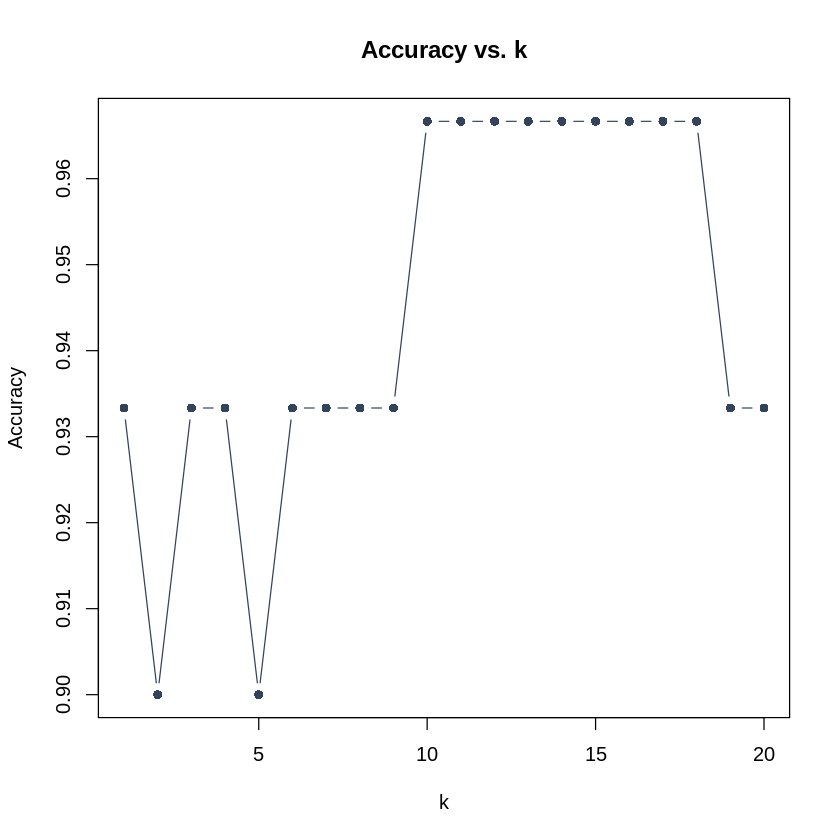

In [3]:
model_knn<-list();accuracy_knn<-numeric()
for(i in 1:20)
{
	model_knn[[i]]<-knn(train[,-5],test[,-5],train$class,k=i,prob=T)
	accuracy_knn[i]<-sum(model_knn[[i]]==test$class)/length(test$class)
}
plot(1:20,accuracy_knn,type='b',main='Accuracy vs. k',ylab='Accuracy',xlab='k',col='#33435c',pch=16)

From the plot, we find that there are many values of k which have maximum accuracy among all the values of k.

We proceed to find the maximum accuracy.

In [4]:
max(accuracy_knn)

[1] 0.9666667

Thus, we find that the max accuracy that was obtained by this method is 96.67\%.

Further, we find the least vaue of k with maximum accuracy. This is due to the fact that a greater value of k may lead to overfitting of the data.

In [5]:
k<-min(which(accuracy_knn==max(accuracy_knn)))#min value of k which has the max accuracy
k

[1] 10

Thus, we find the value of k as 10 with an accuracy level of 96.67\%.

### Predictions

We finally classify the iris dataset into the respective classes.

In [6]:
final_model <- knn(train[,-5], test[,-5], train$class, k, prob=TRUE)
model_tab <- table(test$class, final_model)
model_tab

                 final_model
                  Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa               8               0              0
  Iris-versicolor           0               8              1
  Iris-virginica            0               1             12

We find that, while *Iris-setosa* was correctly classified, *Iris-versicolor* and *Iris-virginica* were not classified perfectly, as one of them was interchanged.

The below dataframe gives the details of the test set along with the original and predicted classes:

In [7]:
cbind(test,final_model)

,sepal.len,sepal.wd,petal.len,petal.wd,class,final_model
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
12,4.8,3.4,1.6,0.2,Iris-setosa,Iris-setosa
14,4.3,3.0,1.1,0.1,Iris-setosa,Iris-setosa
21,5.4,3.4,1.7,0.2,Iris-setosa,Iris-setosa
28,5.2,3.5,1.5,0.2,Iris-setosa,Iris-setosa
32,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa
33,5.2,4.1,1.5,0.1,Iris-setosa,Iris-setosa
43,4.4,3.2,1.3,0.2,Iris-setosa,Iris-setosa
47,5.1,3.8,1.6,0.2,Iris-setosa,Iris-setosa
60,5.2,2.7,3.9,1.4,Iris-versicolor,Iris-versicolor
